In [1]:
import eos
import pypmc
import numpy as np
import matplotlib.pyplot as plt

# Simulation of Pseudo Events

EOS can simulate pseudo events from any of its built-in PDFs using Markov chain Monte Carlo techniques.
The examples following in this section illustrate how to find a specific PDF from the list of all built-in PDFs,
simulate the pseudo events from this object, compare to the pseudo events with the analytic results,
and plot 1D and 2D histograms of the pseudo events.

## Listing the built-in Probability Density Functions

You can show the list of probability density functions (PDFs) using the [SignalPDFs](api/python.rst#eos.SignalPDFs) class.
Searching for a specific observable is possible filtering by the full signal PDF name's *prefix*, *name*, or *suffix*, e.g.:

In [2]:
eos.SignalPDFs(prefix='B->Dlnu')

B->Dlnu::dGamma/dq2,"The decay B->P l nu, where both B=(B qbar) and P=(U qbar) are pseudoscalars, and l=e,mu,tau is a lepton."
B->Dlnu::d^2Gamma/dq2/dcos(theta_l),"The decay B->P l nu, where both B=(B qbar) and P=(U qbar) are pseudoscalars, and l=e,mu,tau is a lepton."


## Constructing a 1D PDF and Simulating Pseudo Events

We construct the one-dimension PDF describing the decay distribution in the variable $q^2$ and for $\ell=\mu$ leptons. We create the ``q2`` kinematic variable and set it to an arbitrary starting value.
We set boundaries for the phase space from which we want to sample through the kinematic variables ``q2_min`` and ``q2_max``. If needed, we can shrink the phase space to a volume smaller than physically allowed. The normalization of the PDF will automatically adapt.

We simulate ``stride * N=250000`` pseudo events/samples from the PDF, which are thinned down to ``N=50000``.
The Markov chains can self adapt to the PDF in ``preruns=3`` preruns with ``pre_N=1000`` pseudo events/samples each.

In [3]:
mu_kinematics = eos.Kinematics({
    'q2':            2.0,  'q2_min':            0.02,     'q2_max':           11.6,
})
mu_pdf = eos.SignalPDF.make('B->Dlnu::dGamma/dq2', eos.Parameters(), mu_kinematics, eos.Options())
rng = np.random.mtrand.RandomState(74205)
mu_samples, mu_weights = mu_pdf.sample_mcmc(N=50000, stride=5, pre_N=1000, preruns=3, rng=rng)

Pre-runs:   0%|          | 0/3 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

We repeat the exercise for $\ell=\tau$ leptons, and adapt the phase space accordingly.

In [4]:
tau_kinematics = eos.Kinematics({
    'q2':            4.0,  'q2_min':            3.17,     'q2_max':           11.6,
})
tau_pdf = eos.SignalPDF.make('B->Dlnu::dGamma/dq2', eos.Parameters(), tau_kinematics, eos.Options(l='tau'))
rng = np.random.mtrand.RandomState(74205)
tau_samples, tau_weights = tau_pdf.sample_mcmc(N=50000, stride=5, pre_N=1000, preruns=3, rng=rng)

Pre-runs:   0%|          | 0/3 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

## Comparing the 1D PDF samples with the analytic result ##

We can now histogram the samples and compare the histogram with the analytical result.
Similar to observables, [SignalPDF](api/python.rst#eos.SignalPDF) objects can be plotted as a function of a single kinematic variable,
while keeping all other kinematic variables fixed. The latter is achieved via the ``kinematics`` key.

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$q^2$\\,[$\\textnormal{GeV}^2$]', ylabel='$P(q^2)$'>)

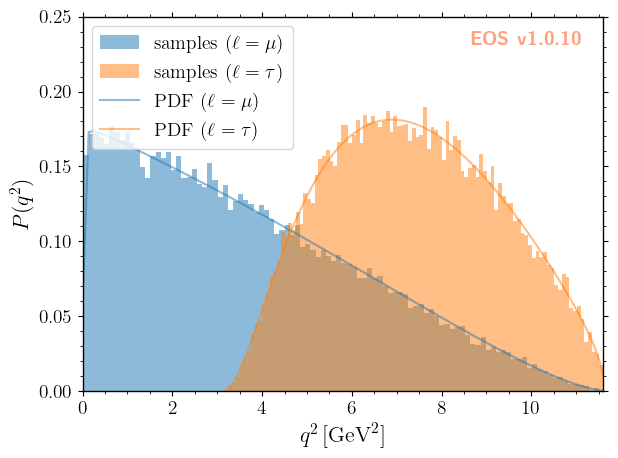

In [5]:
plot_args = {
    'plot': {
        'x': { 'label': r'$q^2$', 'unit': r'$\textnormal{GeV}^2$', 'range': [0.0, 11.60] },
        'y': { 'label': r'$P(q^2)$',                               'range': [0.0,  0.25] },
        'legend': { 'location': 'upper left' }
    },
    'contents': [
        {
            'label': r'samples ($\ell=\mu$)',
            'type': 'histogram',
            'data': {
                'samples': mu_samples
            },
            'color': 'C0'
        },
        {
            'label': r'samples ($\ell=\tau$)',
            'type': 'histogram',
            'data': {
                'samples': tau_samples
            },
            'color': 'C1'
        },
        {
            'label': r'PDF ($\ell=\mu$)',
            'type': 'signal-pdf',
            'pdf': 'B->Dlnu::dGamma/dq2;l=mu',
            'kinematic': 'q2',
            'range': [0.02, 11.60],
            'kinematics': {
                'q2_min':  0.02,
                'q2_max': 11.60,
            },
            'color': 'C0'
        },
        {
            'label': r'PDF ($\ell=\tau$)',
            'type': 'signal-pdf',
            'pdf': 'B->Dlnu::dGamma/dq2;l=tau',
            'kinematic': 'q2',
            'range': [3.17, 11.60],
            'kinematics': {
                'q2_min':  3.17,
                'q2_max': 11.60,
            },
            'color': 'C1'
        },
    ]
}
eos.plot.Plotter(plot_args).plot()

As you can see, we have excellent agreement between our simulations and the respective analytic expressions for the PDFs.

## Constructing a 4D PDF and Simulating Pseudo Events

We can also draw samples for PDFs with more than two kinematic variables. Here, we
use the full four-dimensional PDF for $\bar{B}\to D^*\ell^-\bar\nu$ decays.

We declare and initialize all four kinematic variables (``q2``, ``cos(theta_l)``, ``cos(theta_d)``, and ``phi``),
and provide the phase space boundaries (same names appended with ``_min`` and ``_max``).

We then produce the samples as for the 1D PDF.

In [6]:
dstarlnu_kinematics = eos.Kinematics({
    'q2':            2.0,  'q2_min':            0.02,     'q2_max':           10.5,
    'cos(theta_l)':  0.0,  'cos(theta_l)_min': -1.0,      'cos(theta_l)_max': +1.0,
    'cos(theta_d)':  0.0,  'cos(theta_d)_min': -1.0,      'cos(theta_d)_max': +1.0,
    'phi':           0.3,  'phi_min':           0.0,      'phi_max':           2.0 * np.pi
})
dstarlnu_pdf = eos.SignalPDF.make('B->D^*lnu::d^4Gamma', eos.Parameters(), dstarlnu_kinematics, eos.Options())
rng = np.random.mtrand.RandomState(74205)
dstarlnu_samples, _ = dstarlnu_pdf.sample_mcmc(N=50000, stride=5, pre_N=1000, preruns=3, rng=rng)

Pre-runs:   0%|          | 0/3 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

We can now show correlations of the kinematic variables by plotting 2D histograms, beginning with $q^2$ vs $\cos\theta_\ell$, ...

/opt/venv/lib/python3.10/site-packages/eos/plot/plotter.py:2011: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = self.ax.get_legend_handles_labels()


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$q^2$\\,[$\\textnormal{GeV}^2$]', ylabel='$cos(\\theta_\\ell)$'>)

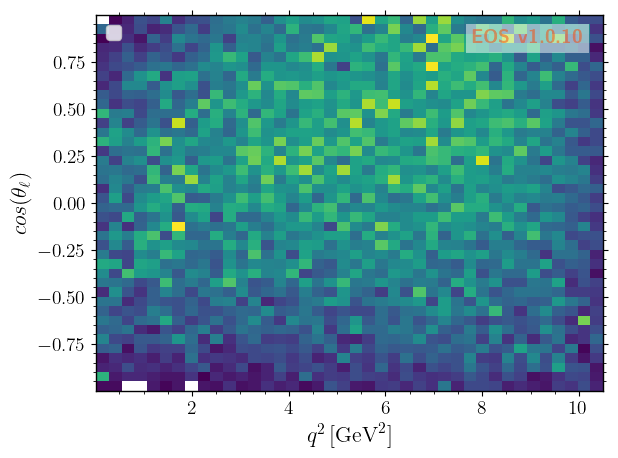

In [7]:
plot_args = {
    'plot': {
        'x': { 'label': r'$q^2$', 'unit': r'$\textnormal{GeV}^2$', 'range': [ 0.0, 10.50] },
        'y': { 'label': r'$cos(\theta_\ell)$',                     'range': [-1.0,  +1.0] },
        'legend': { 'location': 'upper left' }
    },
    'contents': [
        {
            'label': r'samples ($\ell=\mu$)',
            'type': 'histogram2D',
            'data': {
                'samples': dstarlnu_samples[:, (0, 1)]
            },
            'bins': 40
        },
    ]
}
eos.plot.Plotter(plot_args).plot()

... over $\cos\theta_\ell$ vs $\cos\theta_D$ ...

/opt/venv/lib/python3.10/site-packages/eos/plot/plotter.py:2011: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = self.ax.get_legend_handles_labels()


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$cos(\\theta_\\ell)$', ylabel='$cos(\\theta_D)$'>)

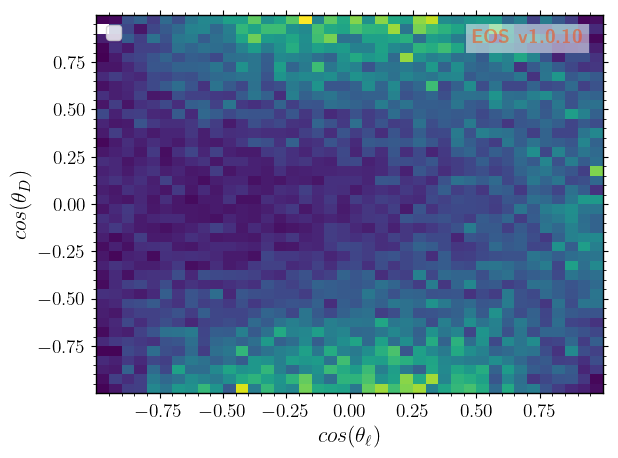

In [8]:
plot_args = {
    'plot': {
        'x': { 'label': r'$cos(\theta_\ell)$',                     'range': [-1.0,  +1.0] },
        'y': { 'label': r'$cos(\theta_D)$',                        'range': [-1.0,  +1.0] },
        'legend': { 'location': 'upper left' }
    },
    'contents': [
        {
            'label': r'samples ($\ell=\mu$)',
            'type': 'histogram2D',
            'data': {
                'samples': dstarlnu_samples[:, (1, 2)]
            },
            'bins': 40
        },
    ]
}
eos.plot.Plotter(plot_args).plot()

... to $q^2$ vs $\phi$.

/opt/venv/lib/python3.10/site-packages/eos/plot/plotter.py:2011: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = self.ax.get_legend_handles_labels()


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$q^2$\\,[$\\textnormal{GeV}^2$]', ylabel='$\\phi$'>)

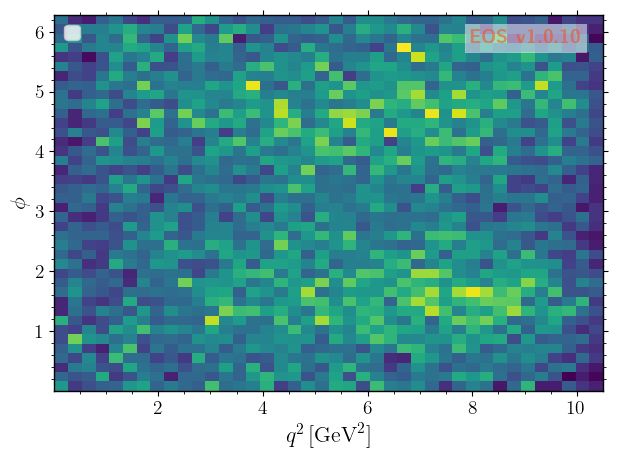

In [9]:
plot_args = {
    'plot': {
        'x': { 'label': r'$q^2$', 'unit': r'$\textnormal{GeV}^2$', 'range': [0.0, 10.70] },
        'y': { 'label': r'$\phi$',                                 'range': [0.0,  6.28] },
        'legend': { 'location': 'upper left' }
    },
    'contents': [
        {
            'label': r'samples ($\ell=\mu$)',
            'type': 'histogram2D',
            'data': {
                'samples': dstarlnu_samples[:, (0, 3)]
            },
            'bins': 40
        },
    ]
}
eos.plot.Plotter(plot_args).plot()